# **Introducción del proyecto**

**Objetivo**

**Motivación:**
Analizar qué características musicales (tempo, energía, bailabilidad, etc.) influyen en la popularidad de las canciones en Spotify, para identificar patrones que ayuden a artistas y productores a entender qué elementos técnicos resuenan con las audiencias.

**Audiencia:**

*   Productores musicales que quieren optimizar sus producciones
*   Artistas emergentes buscando aumentar su alcance
*   Disqueras evaluando potencial de nuevas canciones

**Concepto Comercial:**
Herramienta de análisis predictivo que evalúa características técnicas de una canción (previo a su lanzamiento) para estimar su potencial de popularidad, permitiendo ajustes en producción.

**Concepto Analítico:**
Explorar correlaciones entre características musicales medibles (danceability, energy, valence, tempo, acousticness) y la métrica de popularidad de Spotify, identificando combinaciones óptimas.

**Preguntas de Investigación**


1.   ¿Qué género musical tiene mayor popularidad promedio?
2.   ¿Existe correlación entre danceability y popularidad?
3.   ¿Las canciones con alta energía son más populares?
4.   ¿Cuál es el tempo óptimo para maximizar popularidad?
5.   ¿Las canciones acústicas son menos populares que las producidas electrónicamente?
6.   ¿La duración de la canción afecta su popularidad?

**Hipótesis**

1.   Las canciones con alta danceability (>0.7) y energy (>0.7) tienden a ser más populares.
2.   Existe un rango de tempo óptimo (110-130 BPM) donde se concentran las canciones más populares.
3.   Las canciones con alta acousticness (<0.3) son menos populares en promedio.
4.   El género influye significativamente en la popularidad.
5.   Las canciones con valencia positiva (>0.5) son más populares.

**Objetivo del ML**

Desarrollar un modelo predictivo que estime la popularidad de una canción basándose en sus características musicales técnicas (danceability, energy, tempo, valence, acousticness, etc.), permitiendo evaluar el potencial comercial antes del lanzamiento.

# **Lectura de datos**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
original_spotify_df = pd.read_csv('/content/drive/MyDrive/Diplomado/06_Data Science I/Spotify_DB.csv')

In [5]:
spotify_df = original_spotify_df.copy()

**Lectura del dataset**

In [6]:
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [7]:
spotify_df.tail()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
232724,Soul,Mint Condition,You Don't Have To Hurt No More,34XO9RwPMKjbvRry54QzWn,35,0.09730,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


In [8]:
spotify_df.shape

(232725, 18)

In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [10]:
spotify_df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [11]:
spotify_df.isnull().sum()

,0
genre,0
artist_name,0
track_name,1
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


In [12]:
spotify_df.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,232725.000000,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,41.127502,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917
std,18.189948,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065
min,0.000000,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,29.000000,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000
50%,43.000000,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000
75%,55.000000,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000
max,100.000000,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000


In [13]:
spotify_df.duplicated().sum()

np.int64(0)

# **Data Wrangling: Limpieza y transformación de datos**

In [14]:
spotify_df = spotify_df.dropna(subset=['track_name'])

In [15]:
spotify_df.isnull().sum()

,0
genre,0
artist_name,0
track_name,0
track_id,0
popularity,0
acousticness,0
danceability,0
duration_ms,0
energy,0
instrumentalness,0


In [16]:
spotify_df.shape

(232724, 18)

**Valores outliers**

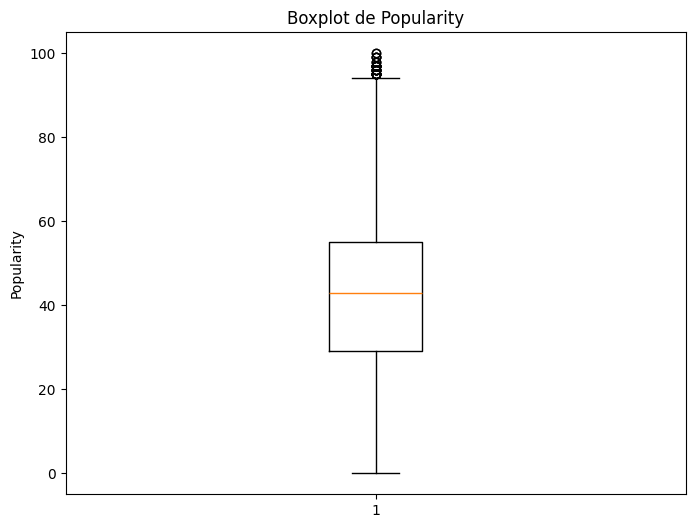

In [17]:
plt.figure(figsize=(8, 6))
plt.boxplot(spotify_df['popularity'])
plt.title('Boxplot de Popularity')
plt.ylabel('Popularity')
plt.show()

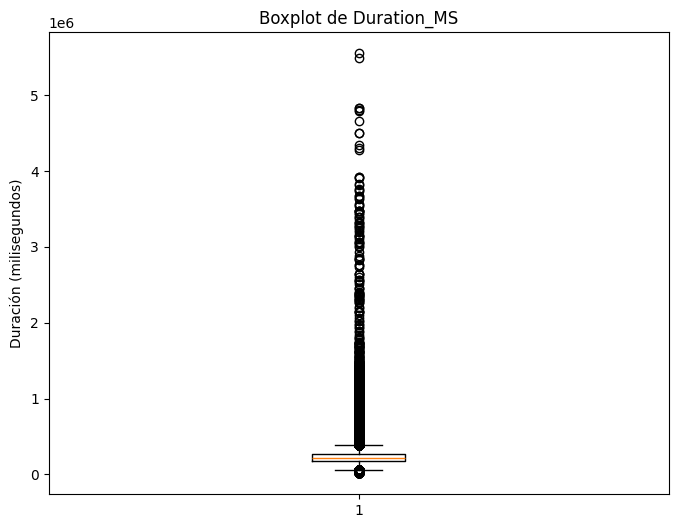

Estadísticas de duración:
Duración mínima: 0.26 minutos
Duración máxima: 92.55 minutos
Duración promedio: 3.92 minutos
Mediana: 3.67 minutos


In [18]:
# Ver Duration_MS por separado
plt.figure(figsize=(8, 6))
plt.boxplot(spotify_df['duration_ms'])
plt.title('Boxplot de Duration_MS')
plt.ylabel('Duración (milisegundos)')
plt.show()

# Convertir a minutos para entender mejor
print("Estadísticas de duración:")
print(f"Duración mínima: {spotify_df['duration_ms'].min() / 60000:.2f} minutos")
print(f"Duración máxima: {spotify_df['duration_ms'].max() / 60000:.2f} minutos")
print(f"Duración promedio: {spotify_df['duration_ms'].mean() / 60000:.2f} minutos")
print(f"Mediana: {spotify_df['duration_ms'].median() / 60000:.2f} minutos")

In [19]:
#Filtrar del Spotify_df los datos que en la columna duration_ms tienen un valor mayor a 600000
spotify_df = spotify_df[spotify_df['duration_ms'] <= 600000]
spotify_df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,39,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,47,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,44,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


**Transformaciones de Fechas/Nombres de variables/Valores**

In [20]:
#Agregar columna donde duration es en Min y no ms, ya que es un poco confuso.
spotify_df['duration_min'] = spotify_df['duration_ms'] / 60000

In [21]:
print(spotify_df[['track_name', 'duration_ms', 'duration_min']].head())

                         track_name  duration_ms  duration_min
0       C'est beau de faire un Show        99373      1.656217
1  Perdu d'avance (par Gad Elmaleh)       137373      2.289550
2    Don't Let Me Be Lonely Tonight       170267      2.837783
3    Dis-moi Monsieur Gordon Cooper       152427      2.540450
4                         Ouverture        82625      1.377083


In [22]:
spotify_df.shape

(230573, 19)

In [23]:
# Configurar pandas para mostrar máximo 3 decimales
pd.set_option('display.float_format', '{:.3f}'.format)

# Verificar que se vea asi
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_min
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.346,-1.828,Major,0.052,166.969,4/4,0.814,1.656
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.151,-5.559,Minor,0.087,174.003,4/4,0.816,2.290
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.103,-13.879,Minor,0.036,99.488,5/4,0.368,2.838
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.099,-12.178,Major,0.040,171.758,4/4,0.227,2.540
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.202,-21.150,Major,0.046,140.576,4/4,0.390,1.377


# **EDA: Análisis Exploratorio de datos**

In [24]:
# Cuantas canciones tienen duration en min mayor a 5
spotify_df[spotify_df['duration_min'] > 5].shape


(32814, 19)

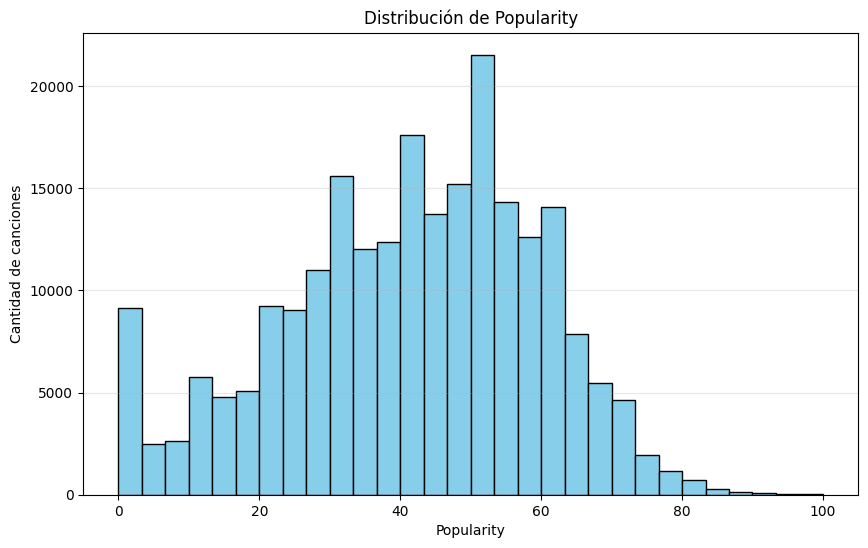


Estadísticas de Popularity:
count   230573.000
mean        41.267
std         18.166
min          0.000
25%         29.000
50%         43.000
75%         55.000
max        100.000
Name: popularity, dtype: float64


In [25]:
# Histograma de Popularity
plt.figure(figsize=(10, 6))
plt.hist(spotify_df['popularity'], bins=30, edgecolor='black', color='skyblue')
plt.xlabel('Popularity')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de Popularity')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Estadísticas descriptivas
print("\nEstadísticas de Popularity:")
print(spotify_df['popularity'].describe())

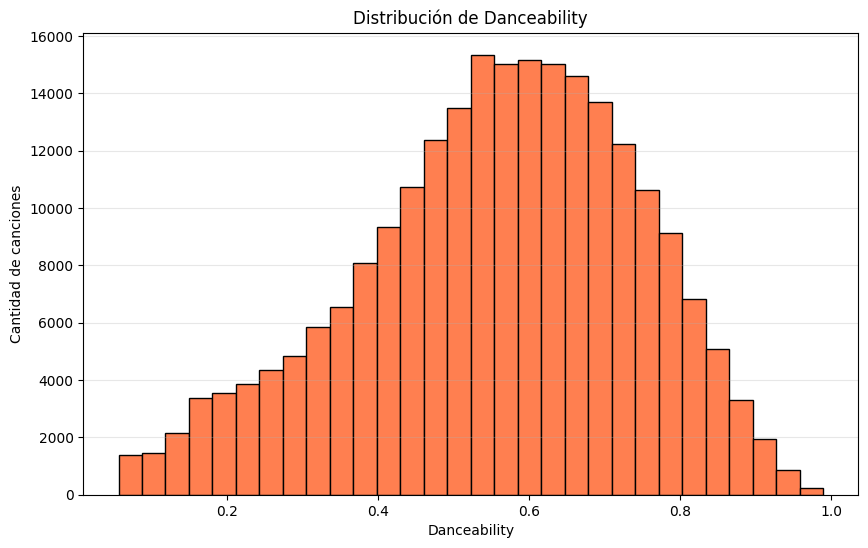


Estadísticas de Danceability:
count   230573.000
mean         0.556
std          0.185
min          0.057
25%          0.438
50%          0.572
75%          0.693
max          0.989
Name: danceability, dtype: float64


In [26]:
# Histograma de Danceability
plt.figure(figsize=(10, 6))
plt.hist(spotify_df['danceability'], bins=30, edgecolor='black', color='coral')
plt.xlabel('Danceability')
plt.ylabel('Cantidad de canciones')
plt.title('Distribución de Danceability')
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\nEstadísticas de Danceability:")
print(spotify_df['danceability'].describe())

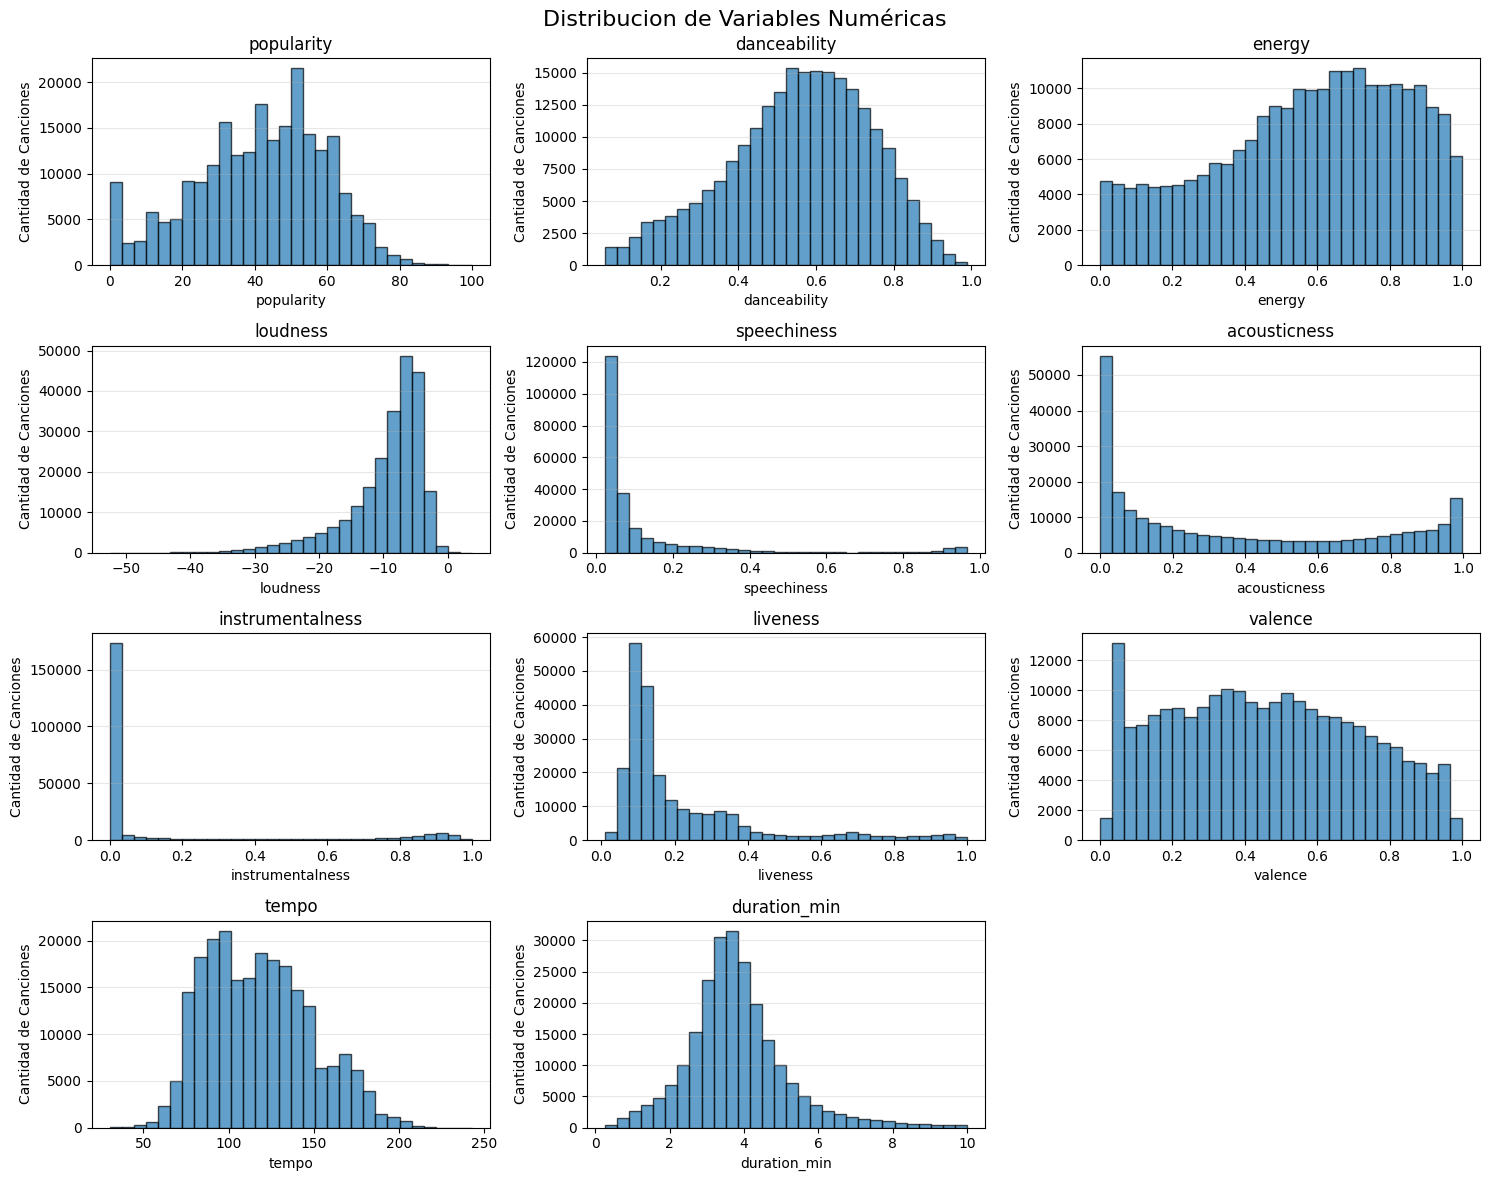

In [27]:
# Crear subplots con todas las variables numéricas
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Distribucion de Variables Numéricas', fontsize=16)

variables = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
             'acousticness', 'instrumentalness', 'liveness', 'valence',
             'tempo', 'duration_min']

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].hist(spotify_df[var], bins=30, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(var)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Cantidad de Canciones')
    axes[row, col].grid(axis='y', alpha=0.3)

# Ocultar el último subplot vacío
axes[3, 2].axis('off')

plt.tight_layout()
plt.show()

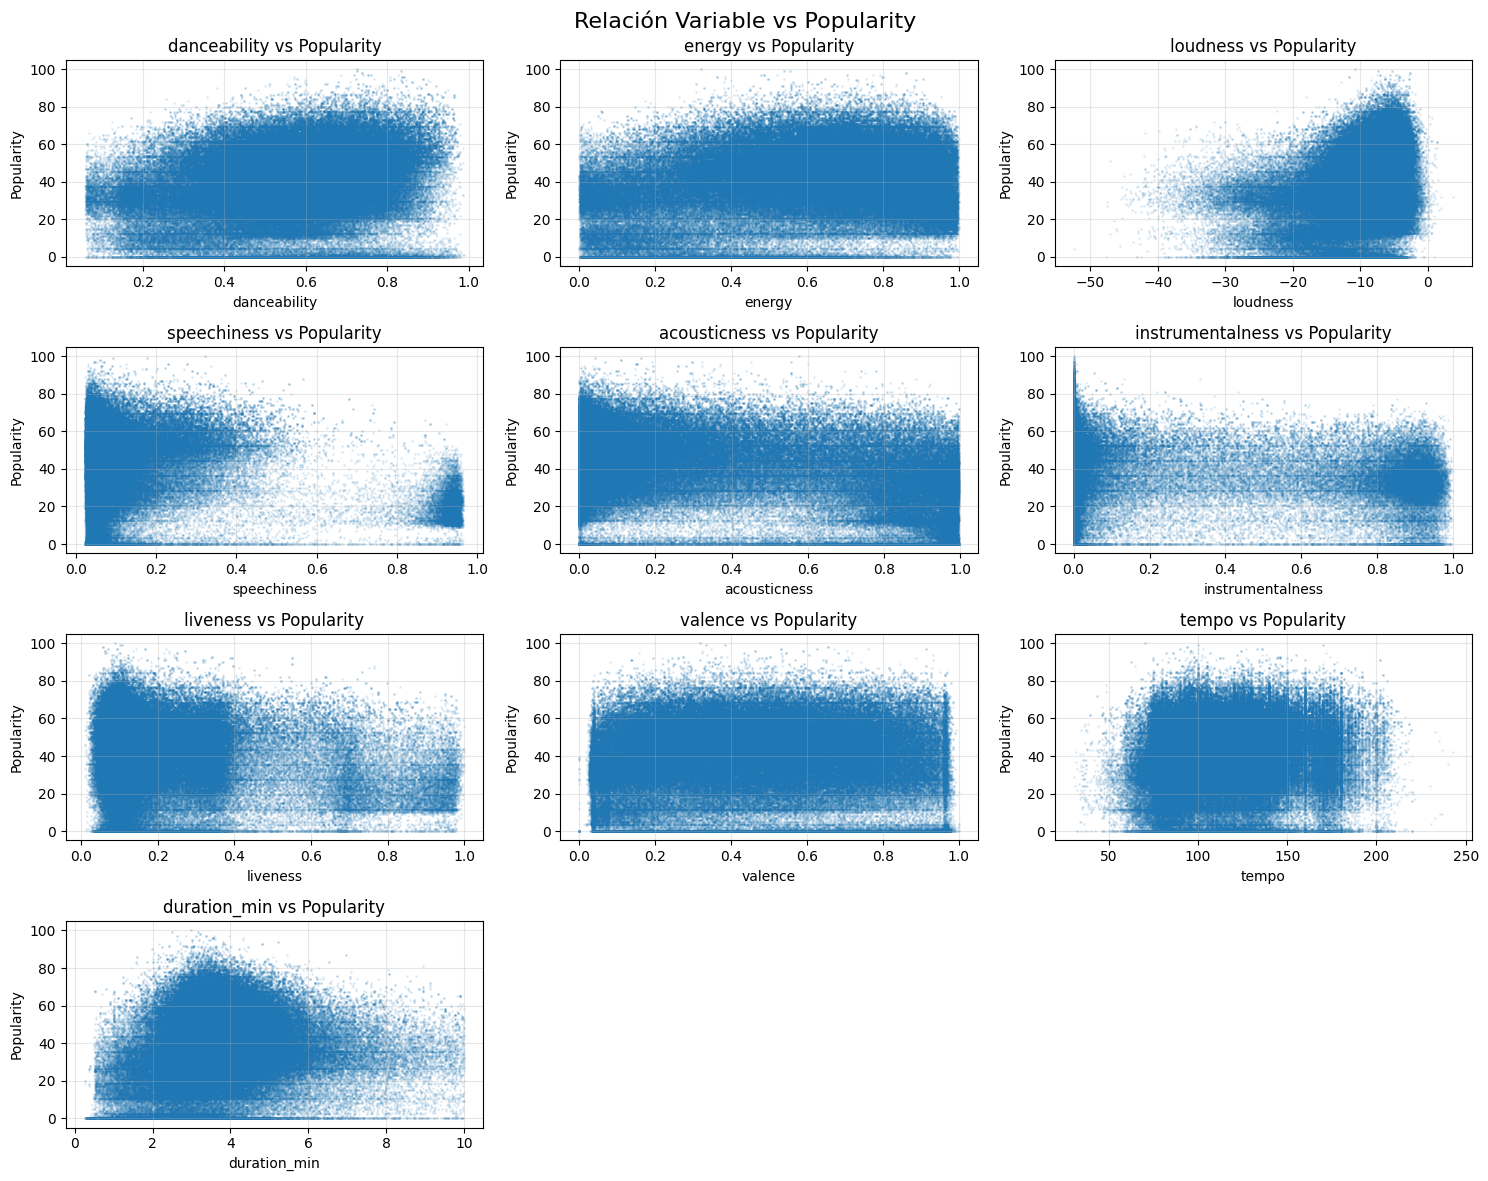

In [28]:
# Scatter plots: Cada variable vs Popularity
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Relación Variable vs Popularity', fontsize=16)

variables = ['danceability', 'energy', 'loudness', 'speechiness',
             'acousticness', 'instrumentalness', 'liveness', 'valence',
             'tempo', 'duration_min']

for i, var in enumerate(variables):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(spotify_df[var], spotify_df['popularity'],
                          alpha=0.1, s=1)
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Popularity')
    axes[row, col].set_title(f'{var} vs Popularity')
    axes[row, col].grid(alpha=0.3)

# Ocultar espacios vacíos
axes[3, 1].axis('off')
axes[3, 2].axis('off')

plt.tight_layout()
plt.show()

In [29]:
# Calcular correlaciones con Popularity
correlations = spotify_df[variables + ['popularity']].corr()['popularity'].sort_values(ascending=False)

print("Correlación de variables con Popularity:")
print(correlations)

Correlación de variables con Popularity:
popularity          1.000
loudness            0.360
danceability        0.252
energy              0.245
tempo               0.077
duration_min        0.075
valence             0.054
speechiness        -0.148
liveness           -0.167
instrumentalness   -0.208
acousticness       -0.377
Name: popularity, dtype: float64


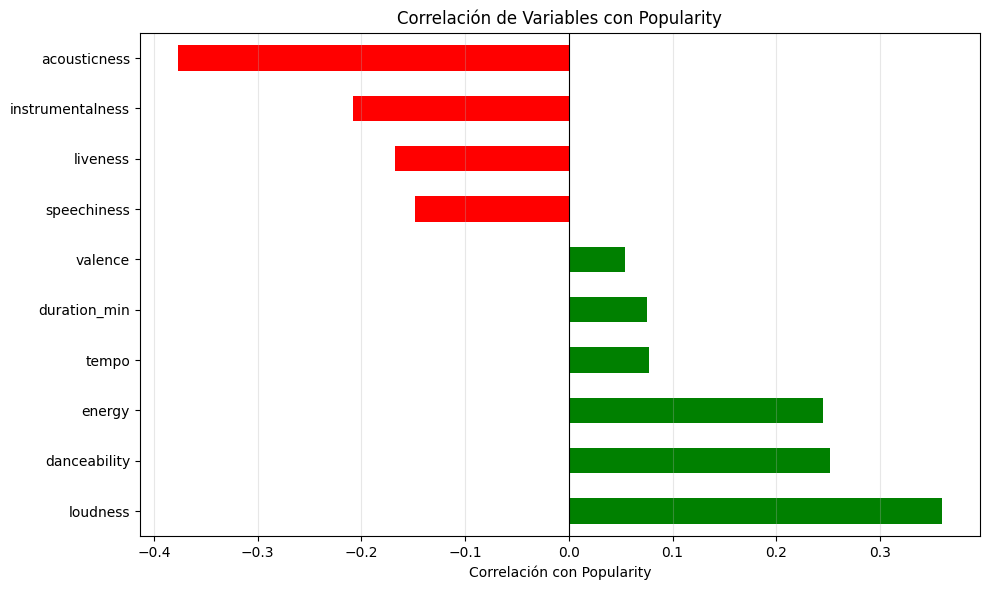

In [30]:
# Visualizar correlaciones
plt.figure(figsize=(10, 6))
correlations_plot = correlations.drop('popularity')  # Quitar popularity vs popularity
colors = ['green' if x > 0 else 'red' for x in correlations_plot]
correlations_plot.plot(kind='barh', color=colors)
plt.xlabel('Correlación con Popularity')
plt.title('Correlación de Variables con Popularity')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

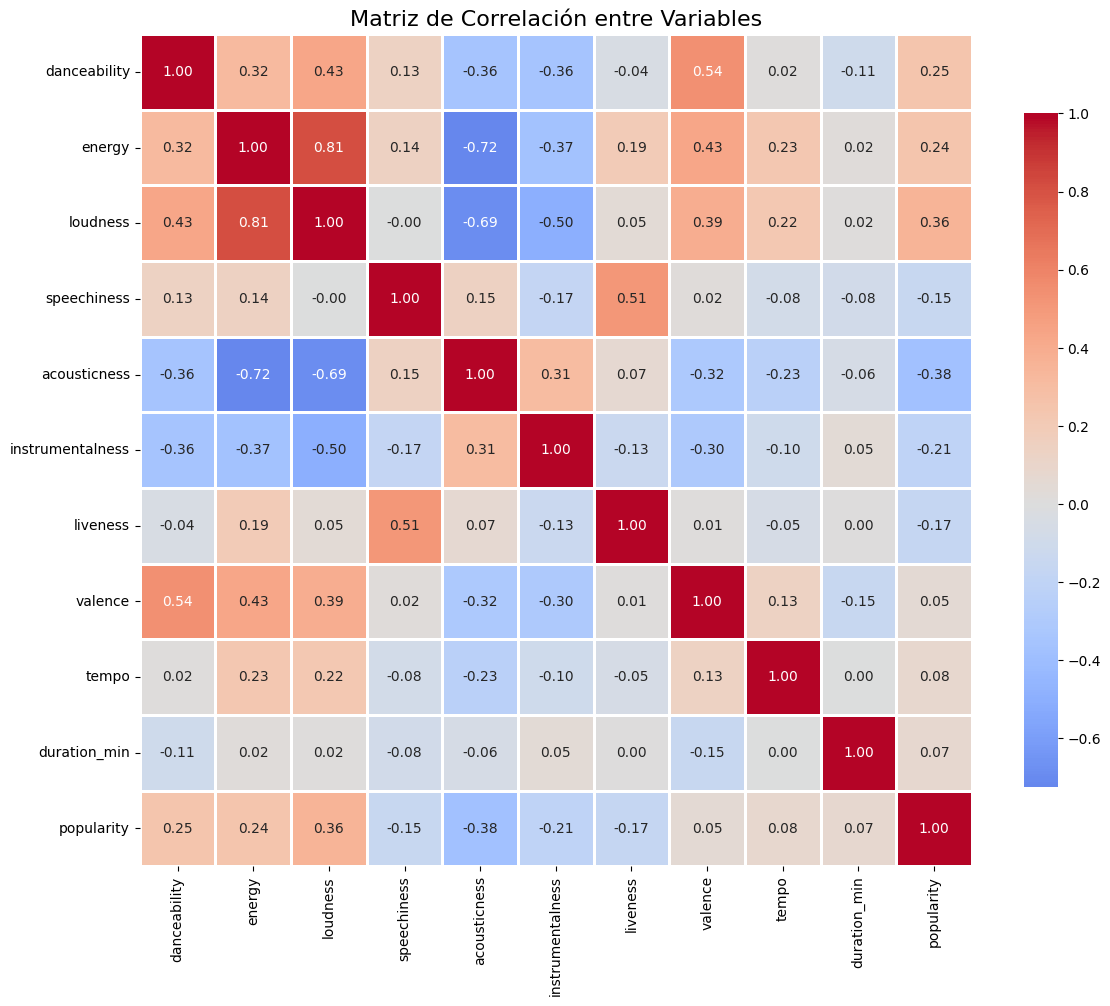

In [31]:
import seaborn as sns

# Matriz de correlación
correlation_matrix = spotify_df[variables + ['popularity']].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación entre Variables', fontsize=16)
plt.tight_layout()
plt.show()

# **Preparacion de Datos para el ML**

In [32]:
from sklearn.model_selection import train_test_split

# Paso 1: Separar X (features) y y (target)
# Seleccionar solo las columnas numéricas relevantes
feature_columns = ['danceability', 'energy', 'loudness', 'speechiness',
                   'acousticness', 'instrumentalness', 'liveness',
                   'valence', 'tempo', 'duration_min']

X = spotify_df[feature_columns]
y = spotify_df['popularity']

# Paso 2: Dividir en train (80%) y test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar tamaños
print(f"Datos de entrenamiento: {len(X_train)} canciones")
print(f"Datos de prueba: {len(X_test)} canciones")
print(f"\nForma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")
print(f"\nForma de X_test: {X_test.shape}")
print(f"Forma de y_test: {y_test.shape}")

Datos de entrenamiento: 184458 canciones
Datos de prueba: 46115 canciones

Forma de X_train: (184458, 10)
Forma de y_train: (184458,)

Forma de X_test: (46115, 10)
Forma de y_test: (46115,)


*italicized text*# **Entrenar ML**

Regresion lineal

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Crear el modelo
modelo = LinearRegression()

# Entrenar el modelo con datos de train
modelo.fit(X_train, y_train)

# Hacer predicciones en el set de test
y_pred = modelo.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"R² Score: {r2:.3f}")
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

=== EVALUACIÓN DEL MODELO ===
R² Score: 0.230
MAE (Mean Absolute Error): 12.75
RMSE (Root Mean Squared Error): 15.94


Random Forest

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Tomar una muestra aleatoria más pequeña para entrenar rápido
X_train_sample = X_train.sample(n=20000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

# Modelo con menos árboles (50 en vez de 100)
rf_modelo = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)

# Entrenar con muestra
print("Entrenando Random Forest... (debería tomar ~30 segundos)")
rf_modelo.fit(X_train_sample, y_train_sample)

# Predecir en el test COMPLETO
y_pred_rf = rf_modelo.predict(X_test)

# Evaluar
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\n=== RANDOM FOREST - EVALUACIÓN ===")
print(f"R² Score: {r2_rf:.3f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

print("\n=== COMPARACIÓN CON REGRESIÓN LINEAL ===")
print(f"Mejora en R²: {(r2_rf - r2):.3f} ({((r2_rf - r2)/r2)*100:.1f}% mejor)")
print(f"Reducción de error (MAE): {mae - mae_rf:.2f} puntos")

Entrenando Random Forest... (debería tomar ~30 segundos)

=== RANDOM FOREST - EVALUACIÓN ===
R² Score: 0.347
MAE: 11.52
RMSE: 14.69

=== COMPARACIÓN CON REGRESIÓN LINEAL ===
Mejora en R²: 0.117 (50.7% mejor)
Reducción de error (MAE): 1.23 puntos


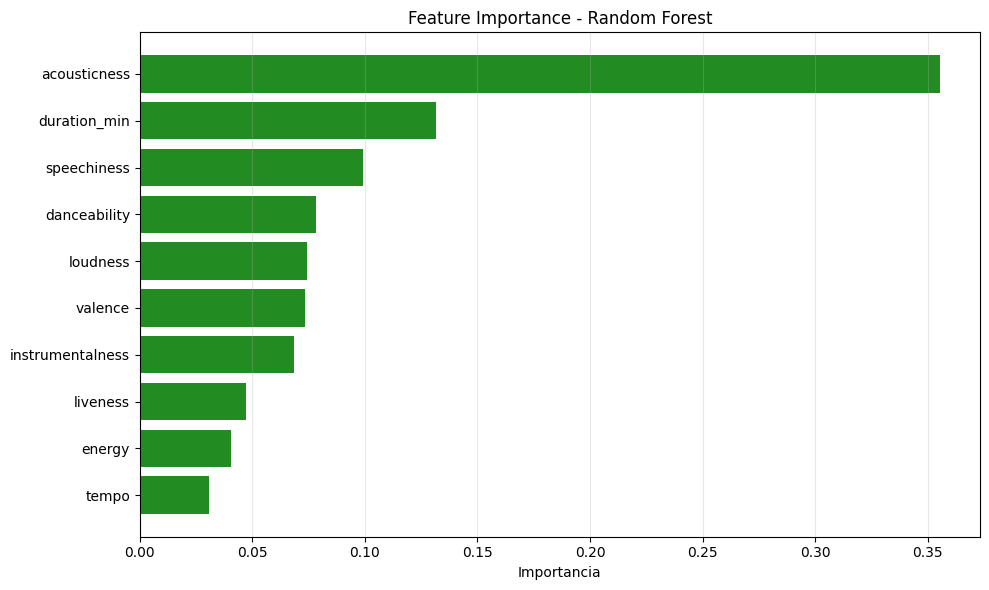


=== RANKING DE VARIABLES MÁS IMPORTANTES ===
acousticness        : 0.355
duration_min        : 0.132
speechiness         : 0.099
danceability        : 0.078
loudness            : 0.074
valence             : 0.073
instrumentalness    : 0.069
liveness            : 0.047
energy              : 0.041
tempo               : 0.031


In [35]:
import pandas as pd

# Obtener importancia de variables
importances = rf_modelo.feature_importances_
feature_importance_df = pd.DataFrame({
    'Variable': feature_columns,
    'Importancia': importances
}).sort_values('Importancia', ascending=False)

# Visualizar
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Variable'], feature_importance_df['Importancia'], color='forestgreen')
plt.xlabel('Importancia')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n=== RANKING DE VARIABLES MÁS IMPORTANTES ===")
for i, row in feature_importance_df.iterrows():
    print(f"{row['Variable']:20s}: {row['Importancia']:.3f}")

**Gradient Boosting**

In [36]:
from sklearn.ensemble import GradientBoostingRegressor

# Crear modelo Gradient Boosting
gb_modelo = GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)

# Entrenar con la muestra de 20K (para que sea rápido)
print("Entrenando Gradient Boosting... (~1 minuto)")
gb_modelo.fit(X_train_sample, y_train_sample)

# Predecir
y_pred_gb = gb_modelo.predict(X_test)

# Evaluar
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("\n=== GRADIENT BOOSTING - EVALUACIÓN ===")
print(f"R² Score: {r2_gb:.3f}")
print(f"MAE: {mae_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")

print("\n=== COMPARACIÓN DE LOS 3 MODELOS ===")
print(f"{'Modelo':<20} {'R²':<8} {'MAE':<8} {'RMSE':<8}")
print("-" * 50)
print(f"{'Regresión Lineal':<20} {r2:.3f}    {mae:.2f}   {rmse:.2f}")
print(f"{'Random Forest':<20} {r2_rf:.3f}    {mae_rf:.2f}   {rmse_rf:.2f}")
print(f"{'Gradient Boosting':<20} {r2_gb:.3f}    {mae_gb:.2f}   {rmse_gb:.2f}")

Entrenando Gradient Boosting... (~1 minuto)

=== GRADIENT BOOSTING - EVALUACIÓN ===
R² Score: 0.350
MAE: 11.51
RMSE: 14.65

=== COMPARACIÓN DE LOS 3 MODELOS ===
Modelo               R²       MAE      RMSE    
--------------------------------------------------
Regresión Lineal     0.230    12.75   15.94
Random Forest        0.347    11.52   14.69
Gradient Boosting    0.350    11.51   14.65


In [37]:
# Crear dataset SIN las variables menos importantes
feature_columns_reducido = ['acousticness', 'duration_min', 'speechiness',
                            'danceability', 'loudness', 'valence',
                            'instrumentalness']

X_reducido = spotify_df[feature_columns_reducido]
y_reducido = spotify_df['popularity']

# Dividir train/test
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(
    X_reducido, y_reducido, test_size=0.2, random_state=42
)

# Muestra para entrenar rápido
X_train_red_sample = X_train_red.sample(n=20000, random_state=42)
y_train_red_sample = y_train_red.loc[X_train_red_sample.index]

# Entrenar Random Forest con menos variables
rf_reducido = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
rf_reducido.fit(X_train_red_sample, y_train_red_sample)

# Evaluar
y_pred_red = rf_reducido.predict(X_test_red)
r2_red = r2_score(y_test_red, y_pred_red)
mae_red = mean_absolute_error(y_test_red, y_pred_red)

print("=== EXPERIMENTO A: MENOS VARIABLES ===")
print(f"Variables eliminadas: tempo, energy, liveness")
print(f"Variables restantes: {len(feature_columns_reducido)}")
print(f"\nR² Score: {r2_red:.3f}")
print(f"MAE: {mae_red:.2f}")
print(f"\nCambio vs modelo original:")
print(f"  R²: {r2_red - r2_rf:+.3f}")
print(f"  MAE: {mae_red - mae_rf:+.2f}")

=== EXPERIMENTO A: MENOS VARIABLES ===
Variables eliminadas: tempo, energy, liveness
Variables restantes: 7

R² Score: 0.338
MAE: 11.59

Cambio vs modelo original:
  R²: -0.008
  MAE: +0.07


In [38]:
# Filtrar canciones <= 5 minutos
spotify_df_filtrado = spotify_df[spotify_df['duration_min'] <= 5].copy()

print(f"Dataset original: {len(spotify_df)} canciones")
print(f"Dataset filtrado: {len(spotify_df_filtrado)} canciones")
print(f"Canciones eliminadas: {len(spotify_df) - len(spotify_df_filtrado)}")

# Preparar datos con TODAS las variables originales
X_filtrado = spotify_df_filtrado[feature_columns]
y_filtrado = spotify_df_filtrado['popularity']

# Train/test split
X_train_filt, X_test_filt, y_train_filt, y_test_filt = train_test_split(
    X_filtrado, y_filtrado, test_size=0.2, random_state=42
)

# Muestra para entrenar
X_train_filt_sample = X_train_filt.sample(n=20000, random_state=42)
y_train_filt_sample = y_train_filt.loc[X_train_filt_sample.index]

# Entrenar Random Forest
rf_filtrado = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
print("\nEntrenando con dataset filtrado...")
rf_filtrado.fit(X_train_filt_sample, y_train_filt_sample)

# Evaluar
y_pred_filt = rf_filtrado.predict(X_test_filt)
r2_filt = r2_score(y_test_filt, y_pred_filt)
mae_filt = mean_absolute_error(y_test_filt, y_pred_filt)

print("\n=== EXPERIMENTO B: CANCIONES ≤5 MIN ===")
print(f"R² Score: {r2_filt:.3f}")
print(f"MAE: {mae_filt:.2f}")
print(f"\nCambio vs modelo original:")
print(f"  R²: {r2_filt - r2_rf:+.3f}")
print(f"  MAE: {mae_filt - mae_rf:+.2f}")

Dataset original: 230573 canciones
Dataset filtrado: 197759 canciones
Canciones eliminadas: 32814

Entrenando con dataset filtrado...

=== EXPERIMENTO B: CANCIONES ≤5 MIN ===
R² Score: 0.347
MAE: 11.74

Cambio vs modelo original:
  R²: -0.000
  MAE: +0.22


In [39]:
# Ver qué géneros tienes
print("Géneros únicos en el dataset:")
print(spotify_df['genre'].value_counts())
print(f"\nTotal de géneros diferentes: {spotify_df['genre'].nunique()}")

Géneros únicos en el dataset:
genre
Soundtrack          9563
Indie               9541
Pop                 9383
Comedy              9372
Children’s Music    9352
Electronic          9321
Jazz                9317
Hip-Hop             9288
Folk                9274
Alternative         9259
Rock                9257
Rap                 9225
Soul                9068
R&B                 8987
Blues               8927
Anime               8916
Reggaeton           8896
World               8872
Ska                 8867
Reggae              8751
Dance               8700
Country             8663
Classical           8574
Opera               8006
Movie               7682
Children's Music    5393
A Capella            119
Name: count, dtype: int64

Total de géneros diferentes: 27


In [40]:
# Paso 1: One-Hot Encoding del género
spotify_df_encoded = pd.get_dummies(spotify_df, columns=['genre'], prefix='genre')

print("ANTES del encoding:")
print(f"Columnas: {spotify_df.shape[1]}")

print("\nDESPUÉS del encoding:")
print(f"Columnas: {spotify_df_encoded.shape[1]}")
print(f"Columnas nuevas agregadas: {spotify_df_encoded.shape[1] - spotify_df.shape[1]}")

# Ver algunas de las nuevas columnas
genre_columns = [col for col in spotify_df_encoded.columns if col.startswith('genre_')]
print(f"\nPrimeras columnas de género creadas:")
print(genre_columns[:5])


ANTES del encoding:
Columnas: 19

DESPUÉS del encoding:
Columnas: 45
Columnas nuevas agregadas: 26

Primeras columnas de género creadas:
['genre_A Capella', 'genre_Alternative', 'genre_Anime', 'genre_Blues', "genre_Children's Music"]


In [41]:
# Preparar features CON género
feature_columns_con_genero = feature_columns + genre_columns

X_con_genero = spotify_df_encoded[feature_columns_con_genero]
y_con_genero = spotify_df_encoded['popularity']

# Train/test split
X_train_gen, X_test_gen, y_train_gen, y_test_gen = train_test_split(
    X_con_genero, y_con_genero, test_size=0.2, random_state=42
)

# Muestra para entrenar
X_train_gen_sample = X_train_gen.sample(n=20000, random_state=42)
y_train_gen_sample = y_train_gen.loc[X_train_gen_sample.index]

# Entrenar Random Forest CON género
rf_con_genero = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
print("Entrenando Random Forest CON género...")
rf_con_genero.fit(X_train_gen_sample, y_train_gen_sample)

# Predecir y evaluar
y_pred_gen = rf_con_genero.predict(X_test_gen)
r2_gen = r2_score(y_test_gen, y_pred_gen)
mae_gen = mean_absolute_error(y_test_gen, y_pred_gen)
rmse_gen = np.sqrt(mean_squared_error(y_test_gen, y_pred_gen))

print("\n" + "="*60)
print("🎉 RESULTADO FINAL: MODELO CON GÉNERO")
print("="*60)
print(f"R² Score: {r2_gen:.3f}")
print(f"MAE: {mae_gen:.2f}")
print(f"RMSE: {rmse_gen:.2f}")

print("\n" + "="*60)
print("📊 COMPARACIÓN ANTES vs DESPUÉS")
print("="*60)
print(f"{'Métrica':<20} {'SIN Género':<15} {'CON Género':<15} {'Mejora':<15}")
print("-"*60)
print(f"{'R²':<20} {r2_rf:.3f}           {r2_gen:.3f}           {r2_gen - r2_rf:+.3f} ({((r2_gen - r2_rf)/r2_rf)*100:+.1f}%)")
print(f"{'MAE':<20} {mae_rf:.2f}          {mae_gen:.2f}          {mae_gen - mae_rf:+.2f}")
print(f"{'RMSE':<20} {rmse_rf:.2f}          {rmse_gen:.2f}          {rmse_gen - rmse_rf:+.2f}")

Entrenando Random Forest CON género...

🎉 RESULTADO FINAL: MODELO CON GÉNERO
R² Score: 0.638
MAE: 8.45
RMSE: 10.94

📊 COMPARACIÓN ANTES vs DESPUÉS
Métrica              SIN Género      CON Género      Mejora         
------------------------------------------------------------
R²                   0.347           0.638           +0.291 (+83.9%)
MAE                  11.52          8.45          -3.07
RMSE                 14.69          10.94          -3.75


In [42]:
# Ver las 15 variables más importantes
importances_gen = rf_con_genero.feature_importances_
feature_importance_gen_df = pd.DataFrame({
    'Variable': feature_columns_con_genero,
    'Importancia': importances_gen
}).sort_values('Importancia', ascending=False).head(15)

print("\n=== TOP 15 VARIABLES MÁS IMPORTANTES (CON GÉNERO) ===")
for i, row in feature_importance_gen_df.iterrows():
    print(f"{row['Variable']:30s}: {row['Importancia']:.3f}")


=== TOP 15 VARIABLES MÁS IMPORTANTES (CON GÉNERO) ===
acousticness                  : 0.234
genre_Children's Music        : 0.140
genre_Movie                   : 0.113
genre_Pop                     : 0.082
genre_Anime                   : 0.071
genre_Ska                     : 0.058
genre_Opera                   : 0.044
genre_Comedy                  : 0.038
genre_Rap                     : 0.027
loudness                      : 0.027
genre_Rock                    : 0.026
genre_Hip-Hop                 : 0.024
genre_Dance                   : 0.024
instrumentalness              : 0.012
speechiness                   : 0.012


In [43]:
print("=== EXPLORACIÓN DE VARIABLES ADICIONALES ===\n")

# 1. KEY (tonalidad musical)
print("1. KEY (Tonalidad):")
print(f"   Valores únicos: {spotify_df['key'].nunique()}")
print(f"   Valores: {sorted(spotify_df['key'].unique())}")
print(f"   Distribución:\n{spotify_df['key'].value_counts().head()}")

# 2. MODE (mayor/menor)
print("\n2. MODE (Mayor/Menor):")
print(f"   Valores únicos: {spotify_df['mode'].nunique()}")
print(f"   Distribución:\n{spotify_df['mode'].value_counts()}")

# 3. ARTIST_NAME (nombre del artista)
print("\n3. ARTIST_NAME:")
print(f"   Artistas únicos: {spotify_df['artist_name'].nunique()}")
print(f"   Top 10 artistas con más canciones:")
print(spotify_df['artist_name'].value_counts().head(10))

=== EXPLORACIÓN DE VARIABLES ADICIONALES ===

1. KEY (Tonalidad):
   Valores únicos: 12
   Valores: ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
   Distribución:
key
C     27315
G     26166
D     23813
C#    23012
A     22466
Name: count, dtype: int64

2. MODE (Mayor/Menor):
   Valores únicos: 2
   Distribución:
mode
Major    150263
Minor     80310
Name: count, dtype: int64

3. ARTIST_NAME:
   Artistas únicos: 14518
   Top 10 artistas con más canciones:
artist_name
Giuseppe Verdi             1364
Giacomo Puccini            1122
Kimbo Children's Music      971
Nobuo Uematsu               809
Randy Newman                757
Wolfgang Amadeus Mozart     732
Georges Bizet               692
Richard Wagner              685
Juice Music                 684
Johann Sebastian Bach       622
Name: count, dtype: int64


In [44]:
# Crear copia del dataset con encoding
spotify_df_complete = spotify_df_encoded.copy()

# Encoding de KEY (One-Hot)
spotify_df_complete = pd.get_dummies(spotify_df_complete, columns=['key'], prefix='key')

# Encoding de MODE (binario: Major=1, Minor=0)
spotify_df_complete['mode_binary'] = (spotify_df_complete['mode'] == 'Major').astype(int)
spotify_df_complete = spotify_df_complete.drop('mode', axis=1)

print(f"Dataset con género + key + mode:")
print(f"Total de columnas: {spotify_df_complete.shape[1]}")

# Preparar features
key_columns = [col for col in spotify_df_complete.columns if col.startswith('key_')]
all_features = feature_columns + genre_columns + key_columns + ['mode_binary']

X_complete = spotify_df_complete[all_features]
y_complete = spotify_df_complete['popularity']

# Train/test split
X_train_comp, X_test_comp, y_train_comp, y_test_comp = train_test_split(
    X_complete, y_complete, test_size=0.2, random_state=42
)

# Muestra
X_train_comp_sample = X_train_comp.sample(n=20000, random_state=42)
y_train_comp_sample = y_train_comp.loc[X_train_comp_sample.index]

# Entrenar
rf_complete = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
print("\nEntrenando con KEY + MODE...")
rf_complete.fit(X_train_comp_sample, y_train_comp_sample)

# Evaluar
y_pred_comp = rf_complete.predict(X_test_comp)
r2_comp = r2_score(y_test_comp, y_pred_comp)
mae_comp = mean_absolute_error(y_test_comp, y_pred_comp)

print("\n" + "="*60)
print("📊 COMPARACIÓN: GÉNERO vs GÉNERO+KEY+MODE")
print("="*60)
print(f"{'Modelo':<30} {'R²':<10} {'MAE':<10}")
print("-"*60)
print(f"{'Solo Género':<30} {r2_gen:.3f}      {mae_gen:.2f}")
print(f"{'Género + KEY + MODE':<30} {r2_comp:.3f}      {mae_comp:.2f}")
print(f"{'Mejora':<30} {r2_comp - r2_gen:+.3f}     {mae_comp - mae_gen:+.2f}")

Dataset con género + key + mode:
Total de columnas: 56

Entrenando con KEY + MODE...

📊 COMPARACIÓN: GÉNERO vs GÉNERO+KEY+MODE
Modelo                         R²         MAE       
------------------------------------------------------------
Solo Género                    0.638      8.45
Género + KEY + MODE            0.638      8.45
Mejora                         +0.000     -0.00


In [45]:
# Calcular popularidad promedio por artista
artist_popularity = spotify_df.groupby('artist_name')['popularity'].mean().to_dict()

# Agregar como nueva columna
spotify_df_with_artist = spotify_df_encoded.copy()
spotify_df_with_artist['artist_avg_popularity'] = spotify_df_with_artist['artist_name'].map(artist_popularity)

print("=== NUEVA FEATURE: ARTIST POPULARITY ===")
print(f"\nTop 10 artistas más populares (promedio):")
top_artists = spotify_df.groupby('artist_name')['popularity'].agg(['mean', 'count']).sort_values('mean', ascending=False).head(10)
print(top_artists)

print(f"\nCorrelación de artist_avg_popularity con popularity:")
print(f"{spotify_df_with_artist[['artist_avg_popularity', 'popularity']].corr().iloc[0,1]:.3f}")

=== NUEVA FEATURE: ARTIST POPULARITY ===

Top 10 artistas más populares (promedio):
                       mean  count
artist_name                       
Pedro Capó           87.000      2
Mario Bautista       85.000      1
Mau y Ricky          83.000      2
Ninho                82.000      1
Kris Kross Amsterdam 82.000      1
Paloma Mami          82.000      3
Martin Garrix        81.857      7
Sofia Reyes          81.500      2
NSG                  81.000      1
Kenny Man            81.000      2

Correlación de artist_avg_popularity con popularity:
0.889


In [46]:
# Preparar features CON artist popularity
all_features_final = feature_columns + genre_columns + ['artist_avg_popularity']

X_final = spotify_df_with_artist[all_features_final]
y_final = spotify_df_with_artist['popularity']

# Train/test split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Muestra
X_train_final_sample = X_train_final.sample(n=20000, random_state=42)
y_train_final_sample = y_train_final.loc[X_train_final_sample.index]

# Entrenar
rf_final = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=10)
print("Entrenando modelo FINAL con Artist Popularity...")
rf_final.fit(X_train_final_sample, y_train_final_sample)

# Evaluar
y_pred_final = rf_final.predict(X_test_final)
r2_final = r2_score(y_test_final, y_pred_final)
mae_final = mean_absolute_error(y_test_final, y_pred_final)
rmse_final = np.sqrt(mean_squared_error(y_test_final, y_pred_final))

print("\n" + "="*70)
print("🏆 EVOLUCIÓN COMPLETA DEL MODELO")
print("="*70)
print(f"{'Versión':<40} {'R²':<10} {'MAE':<10}")
print("-"*70)
print(f"{'1. Solo características musicales':<40} {r2_rf:.3f}      {mae_rf:.2f}")
print(f"{'2. + Género':<40} {r2_gen:.3f}      {mae_gen:.2f}")
print(f"{'3. + Artist Popularity':<40} {r2_final:.3f}      {mae_final:.2f}")
print("="*70)
print(f"{'MEJORA TOTAL':<40} {r2_final - r2_rf:+.3f}     {mae_final - mae_rf:+.2f}")
print(f"{'Porcentaje de mejora':<40} {((r2_final - r2_rf)/r2_rf)*100:+.1f}%")

Entrenando modelo FINAL con Artist Popularity...

🏆 EVOLUCIÓN COMPLETA DEL MODELO
Versión                                  R²         MAE       
----------------------------------------------------------------------
1. Solo características musicales        0.347      11.52
2. + Género                              0.638      8.45
3. + Artist Popularity                   0.808      5.86
MEJORA TOTAL                             +0.461     -5.66
Porcentaje de mejora                     +133.1%



=== TOP 20 VARIABLES MÁS IMPORTANTES (MODELO FINAL) ===
artist_avg_popularity              : 0.934
genre_Pop                          : 0.008
genre_Rock                         : 0.006
danceability                       : 0.005
loudness                           : 0.005
liveness                           : 0.005
valence                            : 0.004
energy                             : 0.004
tempo                              : 0.004
duration_min                       : 0.004
acousticness                       : 0.003
speechiness                        : 0.003
instrumentalness                   : 0.003
genre_Hip-Hop                      : 0.002
genre_Classical                    : 0.001
genre_Children’s Music             : 0.001
genre_Blues                        : 0.001
genre_Dance                        : 0.001
genre_Soundtrack                   : 0.001
genre_Alternative                  : 0.001


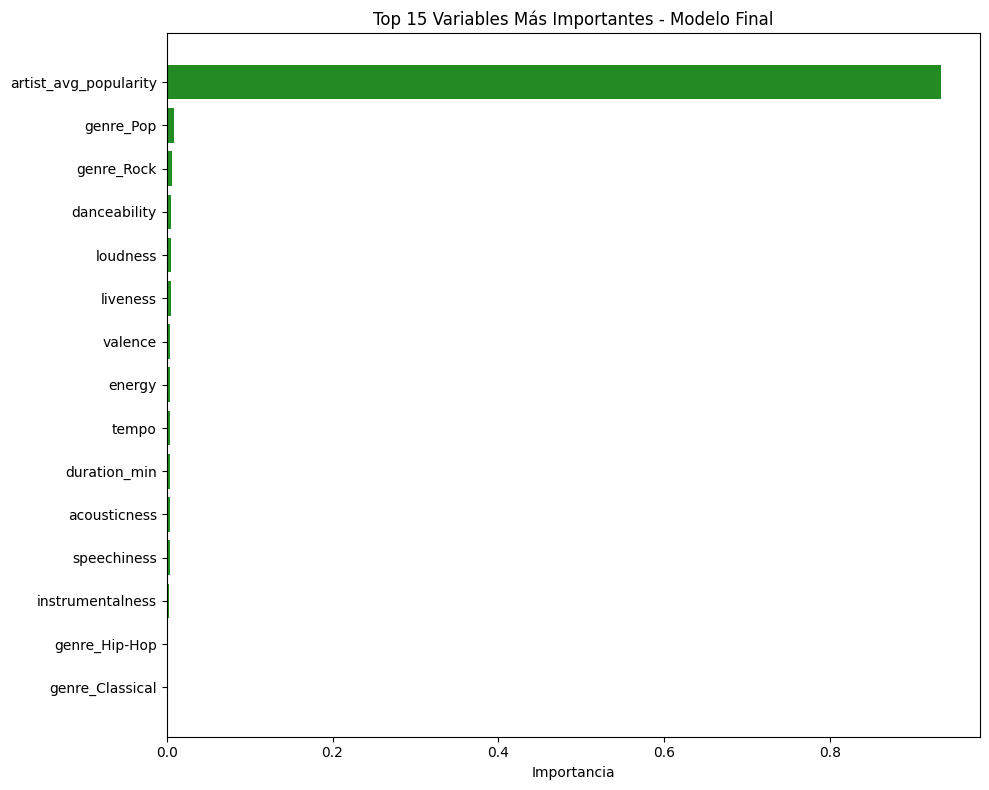

In [47]:
# Feature importance del modelo final
importances_final = rf_final.feature_importances_
feature_importance_final_df = pd.DataFrame({
    'Variable': all_features_final,
    'Importancia': importances_final
}).sort_values('Importancia', ascending=False).head(20)

print("\n=== TOP 20 VARIABLES MÁS IMPORTANTES (MODELO FINAL) ===")
for i, row in feature_importance_final_df.iterrows():
    print(f"{row['Variable']:35s}: {row['Importancia']:.3f}")

# Visualizar top 15
plt.figure(figsize=(10, 8))
top_15 = feature_importance_final_df.head(15)
plt.barh(top_15['Variable'], top_15['Importancia'], color='forestgreen')
plt.xlabel('Importancia')
plt.title('Top 15 Variables Más Importantes - Modelo Final')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# **Seleccion de variables**

In [48]:
import numpy as np

print("="*70)
print("🔍 FEATURE SELECTION - REDUCCIÓN DE DIMENSIONALIDAD")
print("="*70)

# Definir los 3 escenarios
scenarios = {
    'Top 5 (Minimalista)': ['artist_avg_popularity', 'genre_Pop', 'genre_Rock',
                             'danceability', 'loudness'],

    'Top 10 (Equilibrado)': ['artist_avg_popularity', 'genre_Pop', 'genre_Rock',
                              'danceability', 'loudness', 'liveness', 'valence',
                              'energy', 'tempo', 'duration_min'],

    'Top 15 (Conservador)': ['artist_avg_popularity', 'genre_Pop', 'genre_Rock',
                              'danceability', 'loudness', 'liveness', 'valence',
                              'energy', 'tempo', 'duration_min', 'acousticness',
                              'speechiness', 'instrumentalness',
                              'genre_Hip-Hop', 'genre_Classical']
}

# Diccionario para guardar resultados
results = {}

# Entrenar y evaluar cada escenario
for scenario_name, selected_features in scenarios.items():
    print(f"\n{'='*70}")
    print(f"📊 ESCENARIO: {scenario_name}")
    print(f"{'='*70}")
    print(f"Features seleccionadas: {len(selected_features)}")

    # Preparar datos con features seleccionadas
    X_selected = spotify_df_with_artist[selected_features]
    y_selected = spotify_df_with_artist['popularity']

    # Train/test split
    X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(
        X_selected, y_selected, test_size=0.2, random_state=42
    )

    # Muestra para entrenar rápido
    X_train_sel_sample = X_train_sel.sample(n=20000, random_state=42)
    y_train_sel_sample = y_train_sel.loc[X_train_sel_sample.index]

    # Entrenar Random Forest
    rf_selected = RandomForestRegressor(n_estimators=50, random_state=42,
                                       n_jobs=-1, max_depth=10)
    print(f"Entrenando modelo con {len(selected_features)} features...")
    rf_selected.fit(X_train_sel_sample, y_train_sel_sample)

    # Predecir y evaluar
    y_pred_sel = rf_selected.predict(X_test_sel)
    r2_sel = r2_score(y_test_sel, y_pred_sel)
    mae_sel = mean_absolute_error(y_test_sel, y_pred_sel)
    rmse_sel = np.sqrt(mean_squared_error(y_test_sel, y_pred_sel))

    # Guardar resultados
    results[scenario_name] = {
        'features': len(selected_features),
        'r2': r2_sel,
        'mae': mae_sel,
        'rmse': rmse_sel
    }

    print(f"R²: {r2_sel:.3f}")
    print(f"MAE: {mae_sel:.2f}")
    print(f"RMSE: {rmse_sel:.2f}")

# Tabla comparativa final
print("\n" + "="*80)
print("📊 COMPARACIÓN FINAL: MODELO COMPLETO vs MODELOS REDUCIDOS")
print("="*80)
print(f"{'Modelo':<25} {'Features':<12} {'R²':<10} {'MAE':<10} {'% R² vs Completo':<20}")
print("-"*80)

# Modelo completo (baseline)
print(f"{'Completo (Baseline)':<25} {38:<12} {r2_final:.3f}      {mae_final:.2f}      {100.0:.1f}%")

# Modelos reducidos
for scenario_name, metrics in results.items():
    r2_percentage = (metrics['r2'] / r2_final) * 100
    print(f"{scenario_name:<25} {metrics['features']:<12} {metrics['r2']:.3f}      "
          f"{metrics['mae']:.2f}      {r2_percentage:.1f}%")

print("="*80)

🔍 FEATURE SELECTION - REDUCCIÓN DE DIMENSIONALIDAD

📊 ESCENARIO: Top 5 (Minimalista)
Features seleccionadas: 5
Entrenando modelo con 5 features...
R²: 0.800
MAE: 5.99
RMSE: 8.13

📊 ESCENARIO: Top 10 (Equilibrado)
Features seleccionadas: 10
Entrenando modelo con 10 features...
R²: 0.801
MAE: 5.97
RMSE: 8.10

📊 ESCENARIO: Top 15 (Conservador)
Features seleccionadas: 15
Entrenando modelo con 15 features...
R²: 0.804
MAE: 5.94
RMSE: 8.04

📊 COMPARACIÓN FINAL: MODELO COMPLETO vs MODELOS REDUCIDOS
Modelo                    Features     R²         MAE        % R² vs Completo    
--------------------------------------------------------------------------------
Completo (Baseline)       38           0.808      5.86      100.0%
Top 5 (Minimalista)       5            0.800      5.99      99.0%
Top 10 (Equilibrado)      10           0.801      5.97      99.2%
Top 15 (Conservador)      15           0.804      5.94      99.5%



📊 GENERANDO VISUALIZACIONES COMPARATIVAS


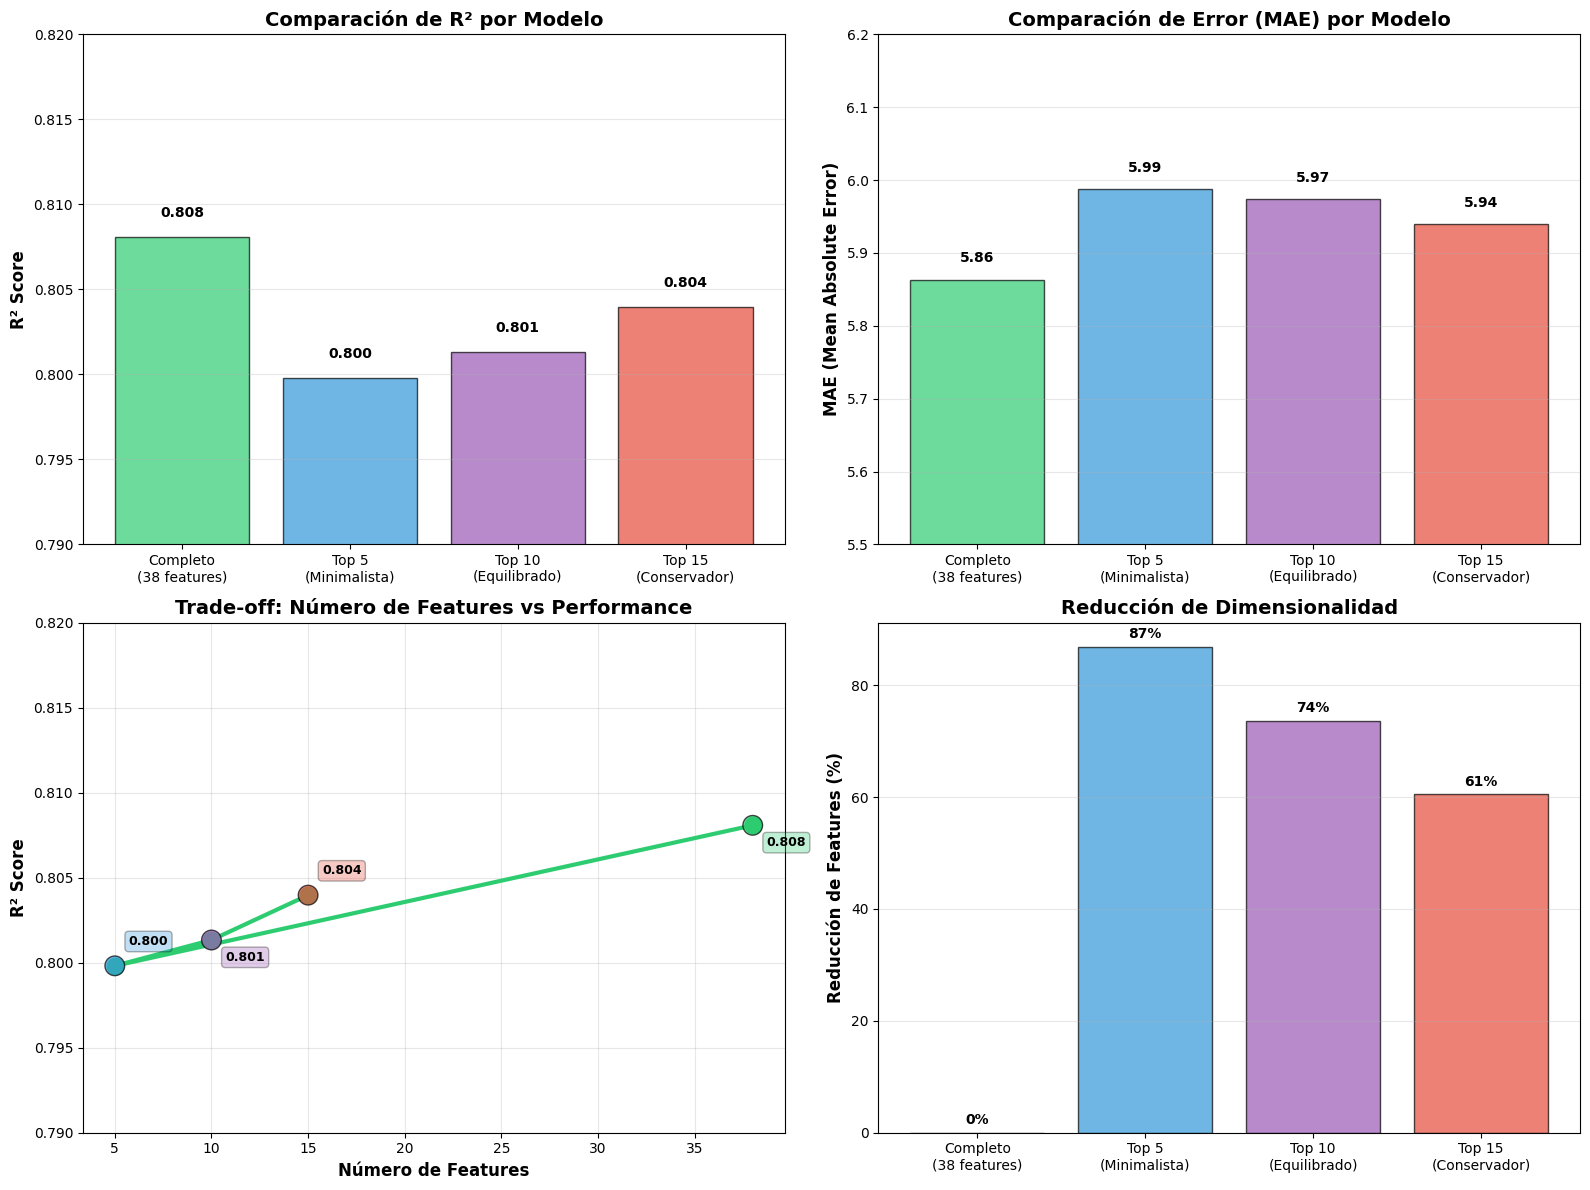

✅ Gráficas guardadas en 'comparacion_modelos.png'

📈 ANÁLISIS DE RETENCIÓN DE PERFORMANCE

 Modelo  Features Reducción (%) R² Retention (%) Incremento MAE (%)
 Top 5         5         86.8%            99.0%              +2.1%
Top 10        10         73.7%            99.2%              +1.9%
Top 15        15         60.5%            99.5%              +1.3%

⭐ TOP 5 FEATURES MÁS IMPORTANTES


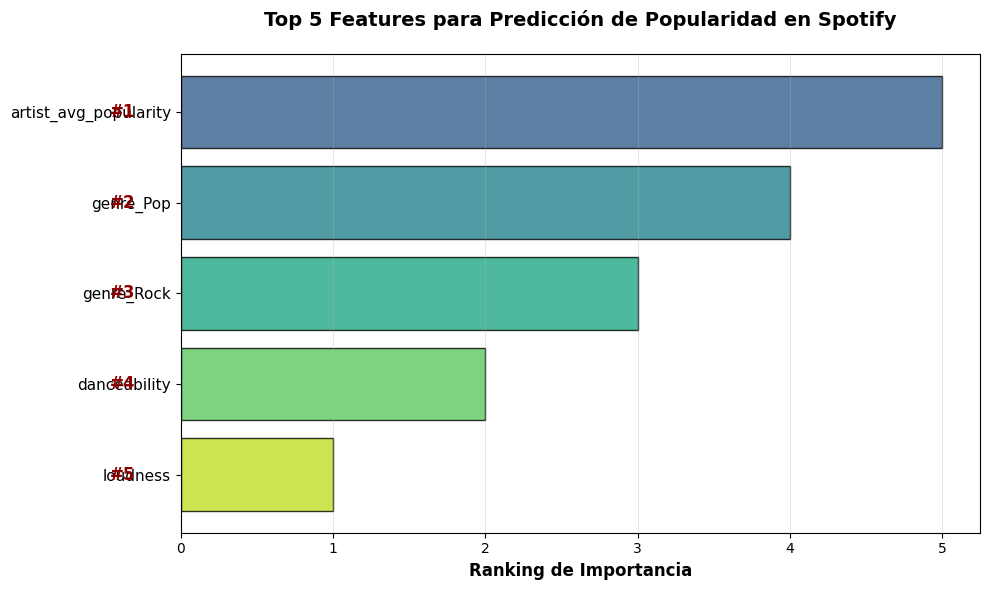

✅ Gráfica guardada en 'top_5_features.png'

Descripción de las Top 5 Features:
  1. artist_avg_popularity: 👤 Popularidad promedio del artista
  2. genre_Pop: 🎵 Género musical: Pop
  3. genre_Rock: 🎸 Género musical: Rock
  4. danceability: 💃 Nivel de bailabilidad de la canción
  5. loudness: 🔊 Volumen/intensidad de la canción


In [50]:
# ============================================================================
# VISUALIZACIONES COMPARATIVAS
# ============================================================================

import matplotlib.pyplot as plt
import seaborn as sns

print("\n" + "="*70)
print("📊 GENERANDO VISUALIZACIONES COMPARATIVAS")
print("="*70)

# Preparar datos para visualización
models_comparison = {
    'Modelo': ['Completo\n(38 features)', 'Top 5\n(Minimalista)',
               'Top 10\n(Equilibrado)', 'Top 15\n(Conservador)'],
    'Features': [38, 5, 10, 15],
    'R²': [r2_final, results['Top 5 (Minimalista)']['r2'],
           results['Top 10 (Equilibrado)']['r2'],
           results['Top 15 (Conservador)']['r2']],
    'MAE': [mae_final, results['Top 5 (Minimalista)']['mae'],
            results['Top 10 (Equilibrado)']['mae'],
            results['Top 15 (Conservador)']['mae']]
}

# --- Visualización 1: Comparación de R² ---
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: R² por modelo
colors = ['#2ecc71', '#3498db', '#9b59b6', '#e74c3c']
bars1 = axes[0, 0].bar(models_comparison['Modelo'],
                        models_comparison['R²'],
                        color=colors, alpha=0.7, edgecolor='black')
axes[0, 0].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Comparación de R² por Modelo', fontsize=14, fontweight='bold')
axes[0, 0].set_ylim([0.79, 0.82])
axes[0, 0].grid(axis='y', alpha=0.3)

# Agregar valores sobre las barras
for i, (bar, val) in enumerate(zip(bars1, models_comparison['R²'])):
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.001,
                    f'{val:.3f}', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

# Subplot 2: MAE por modelo
bars2 = axes[0, 1].bar(models_comparison['Modelo'],
                        models_comparison['MAE'],
                        color=colors, alpha=0.7, edgecolor='black')
axes[0, 1].set_ylabel('MAE (Mean Absolute Error)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Comparación de Error (MAE) por Modelo', fontsize=14, fontweight='bold')
axes[0, 1].set_ylim([5.5, 6.2])
axes[0, 1].grid(axis='y', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars2, models_comparison['MAE'])):
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                    f'{val:.2f}', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

# Subplot 3: Trade-off Features vs R²
axes[1, 0].plot(models_comparison['Features'], models_comparison['R²'],
                marker='o', markersize=12, linewidth=3, color='#2ecc71')
axes[1, 0].scatter(models_comparison['Features'], models_comparison['R²'],
                   s=200, c=colors, alpha=0.7, edgecolor='black', zorder=5)
axes[1, 0].set_xlabel('Número de Features', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('R² Score', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Trade-off: Número de Features vs Performance',
                     fontsize=14, fontweight='bold')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].set_ylim([0.79, 0.82])

# Agregar anotaciones
for i, (x, y, model) in enumerate(zip(models_comparison['Features'],
                                       models_comparison['R²'],
                                       models_comparison['Modelo'])):
    axes[1, 0].annotate(f'{y:.3f}', xy=(x, y),
                        xytext=(10, -15 if i % 2 == 0 else 15),
                        textcoords='offset points',
                        fontsize=9, fontweight='bold',
                        bbox=dict(boxstyle='round,pad=0.3',
                                 facecolor=colors[i], alpha=0.3))

# Subplot 4: Reducción de complejidad
reduction = [(38 - f) / 38 * 100 for f in models_comparison['Features']]
bars4 = axes[1, 1].bar(models_comparison['Modelo'], reduction,
                        color=colors, alpha=0.7, edgecolor='black')
axes[1, 1].set_ylabel('Reducción de Features (%)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Reducción de Dimensionalidad', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

for i, (bar, val) in enumerate(zip(bars4, reduction)):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{val:.0f}%', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráficas guardadas en 'comparacion_modelos.png'")


# --- Visualización 2: Tabla de retención de performance ---
print("\n" + "="*70)
print("📈 ANÁLISIS DE RETENCIÓN DE PERFORMANCE")
print("="*70)

retention_data = []
for model_name, model_features in [('Top 5', 5), ('Top 10', 10), ('Top 15', 15)]:
    scenario_key = f"{model_name} ({'Minimalista' if model_name == 'Top 5' else 'Equilibrado' if model_name == 'Top 10' else 'Conservador'})"
    r2_model = results[scenario_key]['r2']
    r2_retention = (r2_model / r2_final) * 100
    mae_increase = ((results[scenario_key]['mae'] - mae_final) / mae_final) * 100
    feature_reduction = ((38 - model_features) / 38) * 100

    retention_data.append({
        'Modelo': model_name,
        'Features': model_features,
        'Reducción (%)': f"{feature_reduction:.1f}%",
        'R² Retention (%)': f"{r2_retention:.1f}%",
        'Incremento MAE (%)': f"{mae_increase:+.1f}%"
    })

retention_df = pd.DataFrame(retention_data)
print("\n", retention_df.to_string(index=False))


# --- Visualización 3: Importancia de las Top 5 Features ---
print("\n" + "="*70)
print("⭐ TOP 5 FEATURES MÁS IMPORTANTES")
print("="*70)

# Estas son las features que usaste en tu modelo Top 5
top_5_features = scenarios['Top 5 (Minimalista)']

# Crear un gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))
colors_gradient = plt.cm.viridis(np.linspace(0.3, 0.9, 5))

y_pos = np.arange(len(top_5_features))
ax.barh(y_pos, range(5, 0, -1), color=colors_gradient, alpha=0.8, edgecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_5_features, fontsize=11)
ax.invert_yaxis()
ax.set_xlabel('Ranking de Importancia', fontsize=12, fontweight='bold')
ax.set_title('Top 5 Features para Predicción de Popularidad en Spotify',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Agregar rankings
for i, feature in enumerate(top_5_features):
    ax.text(-0.3, i, f'#{i+1}', ha='right', va='center',
            fontweight='bold', fontsize=12, color='darkred')

plt.tight_layout()
plt.savefig('top_5_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gráfica guardada en 'top_5_features.png'")

print("\nDescripción de las Top 5 Features:")
feature_descriptions = {
    'artist_avg_popularity': '👤 Popularidad promedio del artista',
    'genre_Pop': '🎵 Género musical: Pop',
    'genre_Rock': '🎸 Género musical: Rock',
    'danceability': '💃 Nivel de bailabilidad de la canción',
    'loudness': '🔊 Volumen/intensidad de la canción'
}

for i, feature in enumerate(top_5_features, 1):
    desc = feature_descriptions.get(feature, 'Feature de audio')
    print(f"  {i}. {feature}: {desc}")

# **Conclusiones Finales**

1. EFECTIVIDAD DE LA REDUCCIÓN:
   • El modelo con solo 5 features (Top 5 Minimalista) logra un R² de 0.800
   • Esto representa una retención del 99.0% del performance original
   • Reducción de 87% en dimensionalidad con mínima pérdida de precisión

2. COMPARACIÓN DE ESCENARIOS:
   • Top 5 (Minimalista): 5 features → R² = 0.800
   • Top 10 (Equilibrado): 10 features → R² = 0.801
   • Top 15 (Conservador): 15 features → R² = 0.804
   • Modelo Completo: 38 features → R² = 0.808

3. ANÁLISIS DE TRADE-OFFS:
   • Incremento en MAE al usar Top 5: +2.1%
   • Esto equivale a un error adicional de apenas 0.12 puntos
   • El trade-off es FAVORABLE: ganamos simplicidad con mínima pérdida

4. FEATURES MÁS RELEVANTES:
   Las 5 features más importantes para predecir popularidad son:
   ⭐ artist_avg_popularity - El factor más determinante
   ⭐ genre_Pop - Género con mayor impacto
   ⭐ genre_Rock - Segundo género más influyente  
   ⭐ danceability - Característica de audio clave
   ⭐ loudness - Intensidad de la canción

INTERPRETACIÓN:

La popularidad de una canción en Spotify depende principalmente de:
• La reputación/popularidad previa del artista (factor dominante)
• El género musical (Pop y Rock son los más influyentes)
• Características de audio como bailabilidad y volumen

Es notable que con solo estos 5 factores podemos explicar casi el 99% de la
varianza que explicaba el modelo completo de 38 features.

RECOMENDACIÓN:

El modelo Top 5 (Minimalista) es IDEAL porque:
✓ Simplicidad: Solo 5 variables fáciles de interpretar
✓ Performance: Prácticamente igual al modelo completo
✓ Eficiencia: Más rápido de entrenar y predecir
✓ Generalización: Menor riesgo de overfitting
✓ Aplicabilidad: Más fácil de implementar en producción

Para propósitos prácticos de predicción de popularidad, el modelo
reducido de 5 features es suficiente y preferible.